## Problem Statement
- Create a model to classify the Quality of an apple based on their features

#1. Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer

from sklearn.naive_bayes import GaussianNB,MultinomialNB

## 2. Data Collection

In [ ]:
# collect the dataset from kaggle,which is used to create a good model for classification
data = pd.read_csv("/content/drive/MyDrive/apple_quality.csv")
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
data.iloc[3]

A_id                   3.0
Size             -0.657196
Weight           -2.271627
Sweetness         1.324874
Crunchiness      -0.097875
Juiciness          3.63797
Ripeness         -3.413761
Acidity        0.790723217
Quality               good
Name: 3, dtype: object

## 3. EDA and 4.Pre-processing

In [ ]:
data.shape   # data set contains 4001 rows and 9 columns

(4001, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


- This data contains some numerical data and categorical data.
- Column ACIDITY  is a numerical column so we can convert obejct to numerical type.
- This data contains one missing row.So we can simply remove those row


In [ ]:
data.drop(4000,axis = 0,inplace = True)   # remove missing row,which contain last row in the data set.

In [ ]:
data["Acidity"] = data["Acidity"].astype("float")   # we can convert Acidity type from object to numerical

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB


In [ ]:
data.duplicated().sum()    # there is no duplicated values are here.

0

In [ ]:
data.Quality.value_counts()  # balanced data

good    2004
bad     1996
Name: Quality, dtype: int64

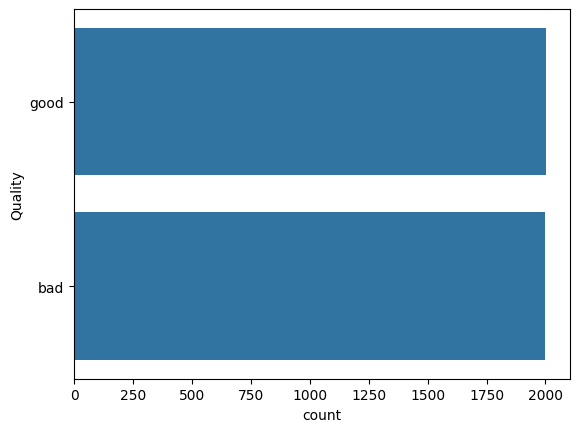

In [ ]:
sns.countplot(data.Quality)
plt.show()

In [ ]:
# we don't have any use of A_id column ,so simply remove those column
fv = data.iloc[:,1:-1]
cv = data.iloc[:,-1]
fv

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720


In [ ]:
# convert good as 0 and bad as 1
cv = cv.map({"good":0,"bad":1})

In [ ]:
cv

0       0
1       0
2       1
3       0
4       0
       ..
3995    1
3996    0
3997    1
3998    0
3999    0
Name: Quality, Length: 4000, dtype: int64

## 5.EDA after Pre-processing

In [ ]:
# Our features are contains numerical data type.
cor_mat = fv.corr()
cor_mat

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000


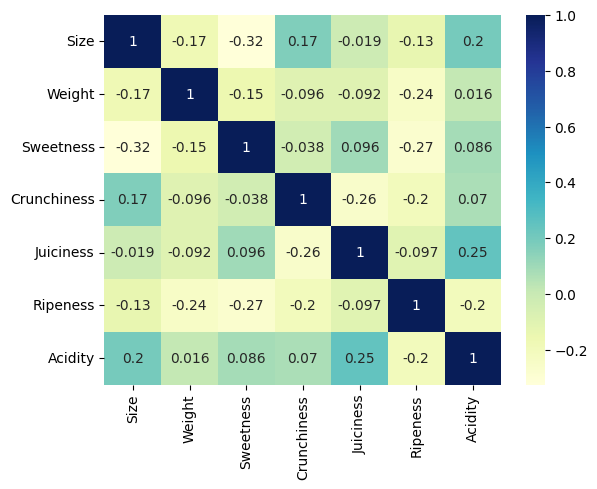

In [ ]:
sns.heatmap(cor_mat,annot=True ,cmap='YlGnBu')
plt.show()

Based on above graph and table, all the features are indipendent only.So we will go with Naive Bayes theroem
- our dataset is a numerical data set so we will go with Gaussian distribution.
- then check each feature follows gaussian distribution or not

##### By using Q-Q plot,I find that those columns are follows Gaussian distribution or Not


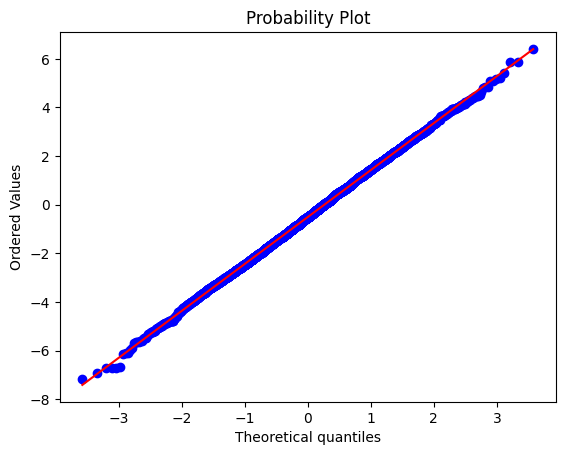

In [ ]:
import scipy.stats as ss
ss.probplot(fv["Size"],dist = "norm",fit = True,plot = plt)   # x_train["size"] = observed data , norm = theoritical data
plt.show()

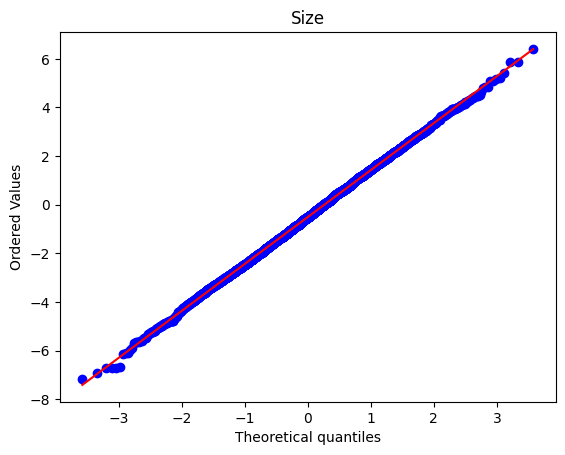

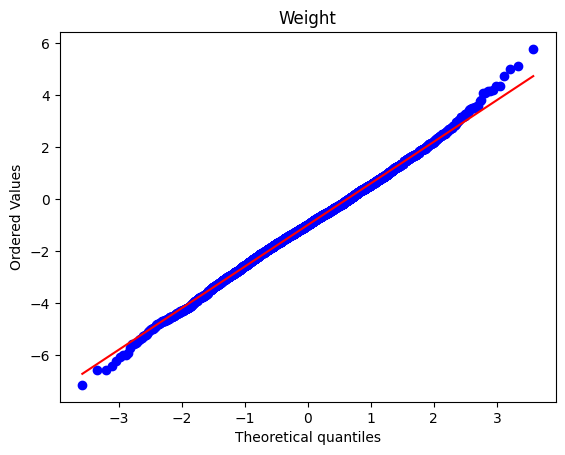

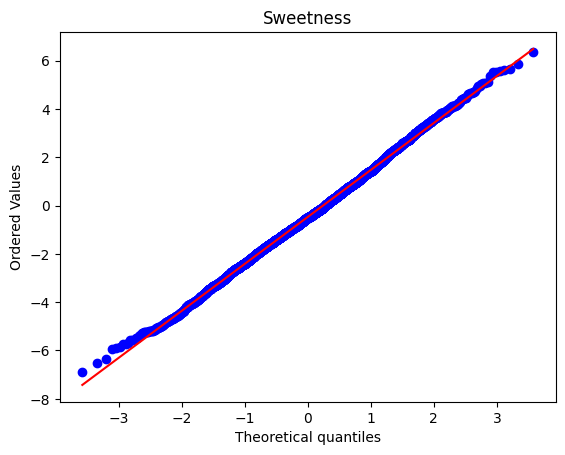

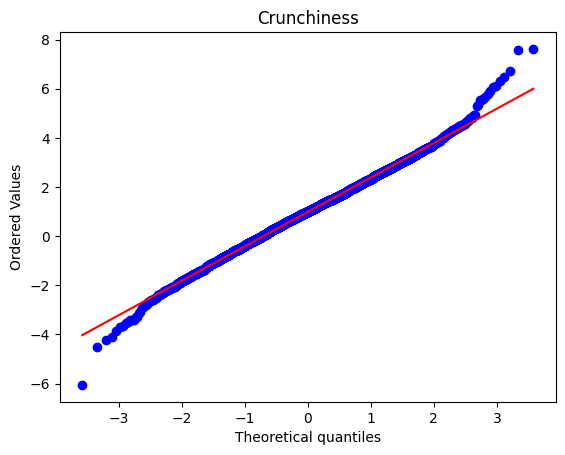

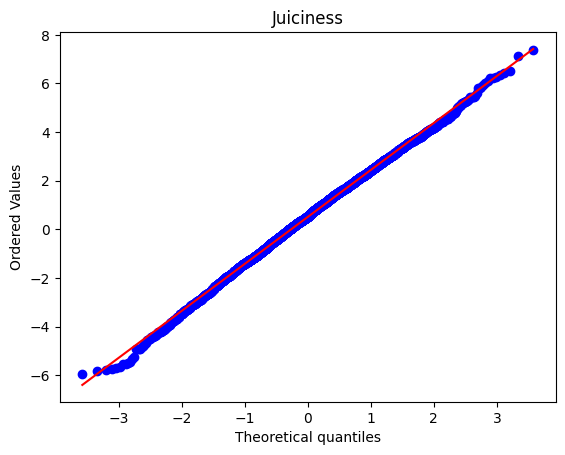

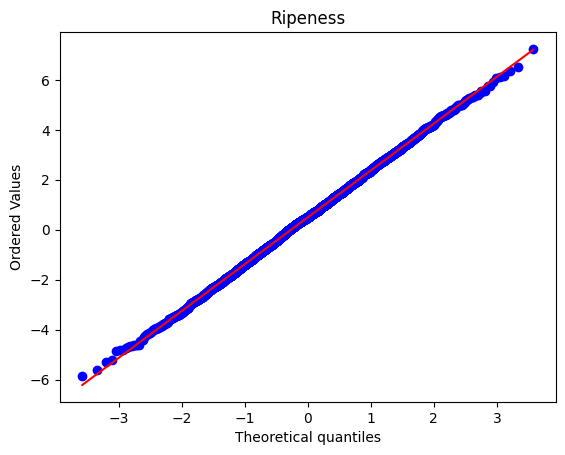

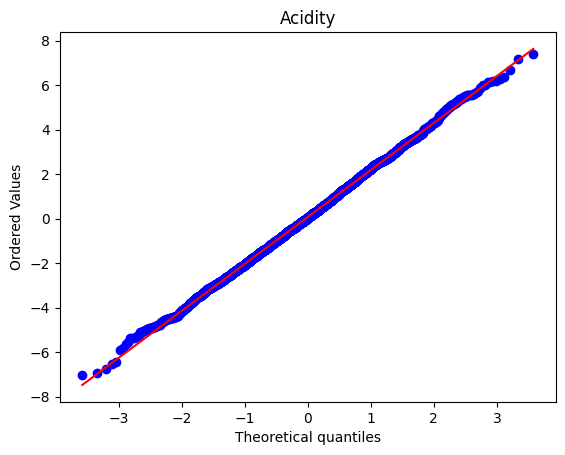

In [ ]:
for y in fv.columns:
    ss.probplot(fv[y],dist = "norm",fit = True,plot = plt)
    plt.title(y)
    plt.show()


Based on above graphs, all the features follows Gaussian distribution,So we performe Gaussian Naive bayes

## 6.Feature Engineering

In [ ]:
# split feature variables and class variables as x_train amd x_test
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size=0.2,stratify=cv)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3200 entries, 2693 to 1562
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         3200 non-null   float64
 1   Weight       3200 non-null   float64
 2   Sweetness    3200 non-null   float64
 3   Crunchiness  3200 non-null   float64
 4   Juiciness    3200 non-null   float64
 5   Ripeness     3200 non-null   float64
 6   Acidity      3200 non-null   float64
dtypes: float64(7)
memory usage: 200.0 KB


In [ ]:
# split x_train into category wise
#my data contains numerical only,so split my data as numerical_data

numerical_data = x_train.select_dtypes(include = ["int64","float64"])

In [ ]:
num_pip = Pipeline([("imputer",SimpleImputer()) ,("Standardization",StandardScaler())])

In [ ]:
numerical_data.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object')

In [ ]:
ctp = ColumnTransformer([("numerical",num_pip,numerical_data.columns)],remainder = "passthrough")

In [ ]:
pd.DataFrame(ctp.fit_transform(x_train),columns=x_train.columns)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,0.006143,0.423320,0.597624,0.486948,-1.754684,-0.382752,-1.262179
1,0.808427,0.549534,-0.545702,-1.091873,-0.032267,-0.215979,0.120247
2,-1.238395,0.776955,0.517409,0.654355,0.852806,0.380383,0.682122
3,0.788650,-0.518322,-0.498561,-0.009086,-0.340499,-0.378315,1.104414
4,0.846748,0.074073,-0.408669,-1.706616,0.625023,-0.150089,0.679442
...,...,...,...,...,...,...,...
3195,0.592363,0.094928,-1.058545,0.474191,-1.111494,-0.045597,-0.474281
3196,2.234597,0.611462,-0.552315,-1.093836,1.461849,-0.114371,0.748831
3197,0.958388,-0.653914,-1.095347,1.074030,0.928413,-0.676656,0.419860
3198,-0.488542,-0.563987,-0.133514,0.731029,-1.342916,0.638938,0.342367


In [ ]:
final_pre=Pipeline([("Pre-Processing",ctp)])

In [ ]:
import pickle
pickle.dump(final_pre,open(r"/content/drive/MyDrive/final_pre.pkl","wb"))

## 7.Training

In [ ]:
# x_train follows gaussian distribution so i can use GaussianNB

In [ ]:
# create an object of GaussianNB class
g = GaussianNB()

# fit x_train and y_train based on gaussian NB
model = g.fit(final_pre.fit_transform(x_train),y_train)

In [ ]:
import pickle
pickle.dump(model,open(r"/content/drive/MyDrive/fmodel.pkl","wb"))

then finally we create a model for the Gaussian Naive bayes

## 8. Model Evalution

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,model.predict(final_pre.transform(x_test)))

array([[302,  99],
       [ 99, 300]])

In [ ]:
print(classification_report(y_test,model.predict(final_pre.transform(x_test))))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       401
           1       0.75      0.75      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



It will give the accuracy rate of 76%

## 9.Testing

In [ ]:
m = final_pre.transform(x_test.iloc[[2]])
pred = model.predict(m)   # it is used to shows that predicted value

if pred == 0:
    print("good")
else:
    print("bad")

good


i will give a query point from x_test as input to the model,then it will returns class label(good / bad)